In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import dist

In [4]:
def fuzzy_c_means(x, c, m):
    v = generate_initial_centroid(c, x)
    for i in range(100):
        u = calculate_membership_of_data(c, m, v, x)
        v = update_the_centroid(m, u, x)

    return u, v

In [5]:
def generate_initial_centroid(c, x):
    v = np.zeros((c, x.shape[1]))
    for j in range(c):
        v[j] = generate_random_centroid(x)
    return v

In [6]:
def generate_random_centroid(data):
    min_values = np.min(data, 0)
    max_values = np.max(data, 0)
    return np.random.uniform(low=min_values, high=max_values)

In [7]:
def calculate_membership_of_data(c, m, v, x):
    number_of_data = x.shape[0]
    u = np.zeros((c, number_of_data))
    for i in range(c):
        for k in range(number_of_data):
            denominator = 0
            for j in range(c):
                denominator += (dist(x[k], v[i]) / dist(x[k], v[j])) ** (2 / (m - 1))
            u[i, k] = 1 / denominator
    return u

In [8]:
def update_the_centroid(m, u, x):
    u_power_m = np.power(u, m)
    numerator = np.dot(u_power_m, x)
    denominator = np.sum(u_power_m, axis=1).reshape(-1, 1)
    return numerator / denominator

In [9]:
def calculate_cost(x, u, v, c, m):
    cost = 0
    number_of_data = len(x)

    for j in range(number_of_data):
        for i in range(c):
            cost += np.power(u[i, j], m) * np.power(np.linalg.norm(x[j] - v[i]), 2)
    return cost

In [10]:
def plot_the_clustering(ax, data, v, cluster, title):
    ax.scatter(x=data[:, 0], y=data[:, 1], c=cluster)
    ax.plot(v[:, 0], v[:, 1], 'or')
    ax.set(xlabel="x1", ylabel='x2', title=title);

In [17]:
data = np.genfromtxt(r"C:\Users\1\fuzzy_cmeans\data\my_data.csv", delimiter=',')

In [19]:
costs = []
m = 1.2
for c in range(1, 6):
    u, v = fuzzy_c_means(data, c, m)
    costs.append(calculate_cost(data, u, v, c, m))

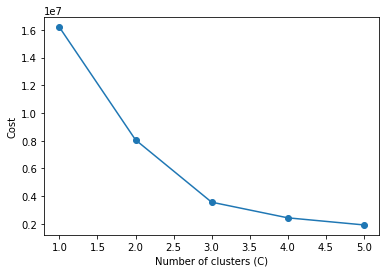

In [20]:
fig, ax = plt.subplots()
ax.plot([i for i in range (1, 6)], costs,
        marker='o')
ax.set(xlabel="Number of clusters (C)", ylabel='Cost');

In [46]:
u, v = fuzzy_c_means(data, c=3, m=1.2)
cluster = u[0] * 0 + u[1] * 0.5 + u[2] * 1

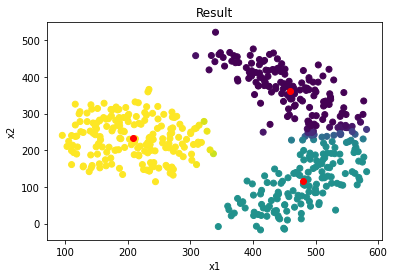

In [47]:
fig, ax = plt.subplots()
plot_the_clustering(ax, data, v, cluster, title='Result')

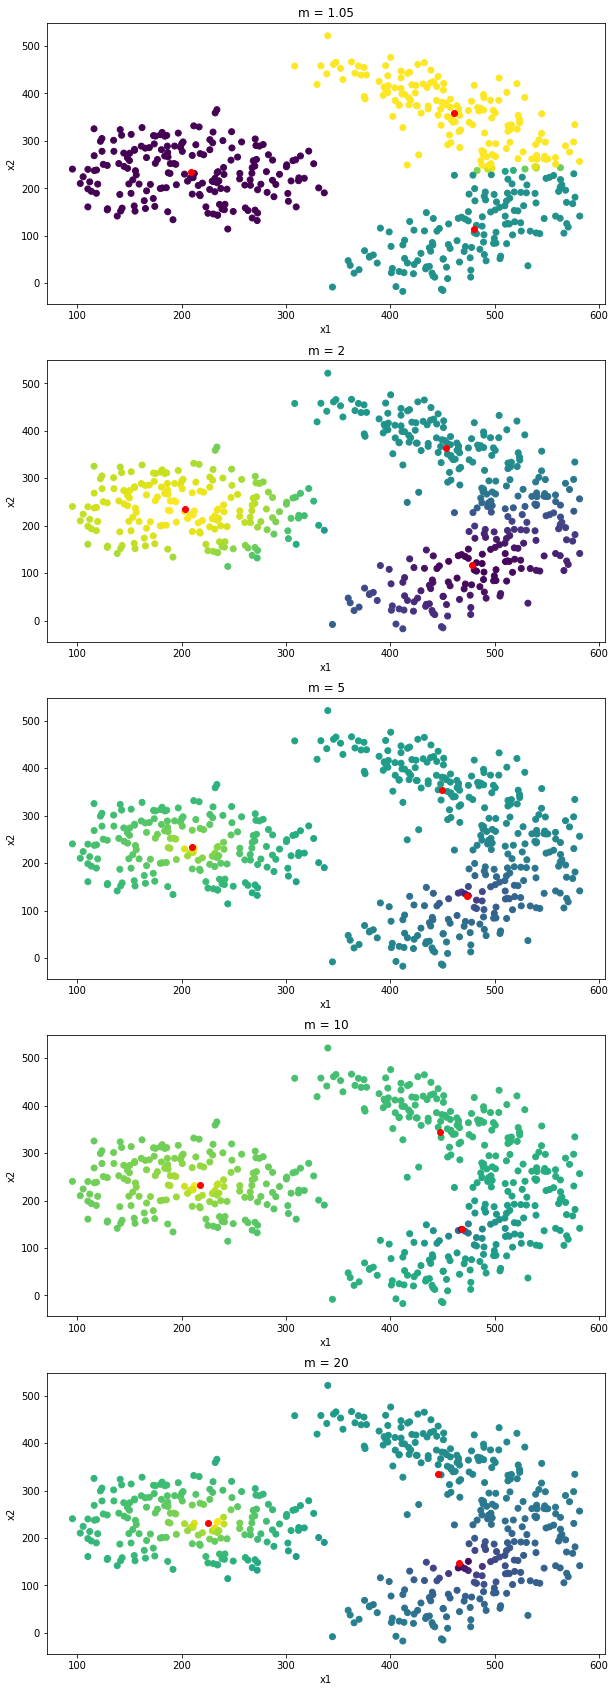

In [48]:
fig, ax = plt.subplots(nrows=5, figsize=(10, 30))

m_list = [1.05, 2, 5, 10, 20]
costs = []
for i, m in enumerate(m_list):
    u, v = fuzzy_c_means(data, c=3, m=m)
    cluster = u[0] * 1 + u[1] * 0.5 + u[2] * 0
    plot_the_clustering(ax[i], data, v, cluster, title=f'm = {m}')
    costs.append(calculate_cost(data, u, v, c=3, m=m))